In [1]:
from pennylane import numpy as np
import pennylane as qml

In [2]:
def predict(dataset, new, k):
    """Function that given a dataset, determines if a new person do like Beatles or not.

    Args:
        - dataset (list): List with the age, minutes that different people watch TV, and if they like Beatles.
        - new (list(int)): Age and TV minutes of the person we want to classify.
        - k (int): number of nearby neighbors to be taken into account.

    Returns:
        - (str): "YES" if they like Beatles, "NO" otherwise.
    """

    # DO NOT MODIFY anything in this code block

    def k_nearest_classes():
        """Function that returns a list of k near neighbors."""
        distances = []
        for data in dataset:
            distances.append(distance(data[0], new))
        nearest = []
        for _ in range(k):
            indx = np.argmin(distances)
            nearest.append(indx)
            distances[indx] += 2

        return [dataset[i][1] for i in nearest]

    output = k_nearest_classes()

    return (
        "YES" if len([i for i in output if i == "YES"]) > len(output) / 2 else "NO",
        float(distance(dataset[0][0], new)),
    )

In [3]:
def distance(A, B):
    """Function that returns the distance between two vectors.

    Args:
        - A (list[int]): person's information: [age, minutes spent watching TV].
        - B (list[int]): person's information: [age, minutes spent watching TV].

    Returns:
        - (float): distance between the two feature vectors.
    """

    # Encode the data in the qubits
    dev = qml.device("default.qubit", wires=1)
    @qml.qnode(dev)
    def get_state(base_state):
        qml.AmplitudeEmbedding(base_state, wires=0, normalize=True)
        return qml.state()
    
    dev = qml.device("default.qubit", wires=3)
    @qml.qnode(dev)
    def circuit(state):
        qml.QubitStateVector(state,wires=[1,2])
        qml.Hadamard(wires=0)
        qml.CSWAP(wires=[0, 1, 2])
        qml.Hadamard(wires=0)

        return qml.expval(qml.PauliZ(wires=0)) # Return the EXPECTATION VALUE of the first qubit

    
    state_AB = np.kron(get_state(A),get_state(B)) # Transform from two single-qubit states to one multi-qubit state
    swap_result = np.sqrt(circuit(state_AB))
    distance = np.sqrt(2 * (1 - swap_result))

    return distance

In [4]:
# DO NOT MODIFY anything in this code block
test0 = "23,150,1,13,20,YES,24,200,YES,14,130,NO,50,20,NO"

inputs = test0.split(",")
dataset = []
new = [int(inputs[0]), int(inputs[1])]
k = int(inputs[2])
for i in range(3, len(inputs), 3):
    dataset.append([[int(inputs[i + 0]), int(inputs[i + 1])], str(inputs[i + 2])])

output = predict(dataset, new, k)
sol = 0 if output[0] == "YES" else 1
print(f"Solution: {sol},{output[1]}")
(output[1]-0.4210528986556)/0.4210528986556

Solution: 0,0.421052898655599


-2.5049391104099716e-15

In [5]:
# DO NOT MODIFY anything in this code block
test1 = "23,10,1,20,100,YES,25,20,YES,14,130,NO,50,20,YES,60,300,YES,45,30,NO,33,20,NO"

inputs = test1.split(",")
dataset = []
new = [int(inputs[0]), int(inputs[1])]
k = int(inputs[2])
for i in range(3, len(inputs), 3):
    dataset.append([[int(inputs[i + 0]), int(inputs[i + 1])], str(inputs[i + 2])])

output = predict(dataset, new, k)
sol = 0 if output[0] == "YES" else 1
print(f"Solution: {sol},{output[1]}")
(output[1]-0.9264606253589677)/0.9264606253589677

Solution: 0,0.9264606253589672


-4.793395398514591e-16

(<Figure size 504x288 with 1 Axes>, <Axes: >)


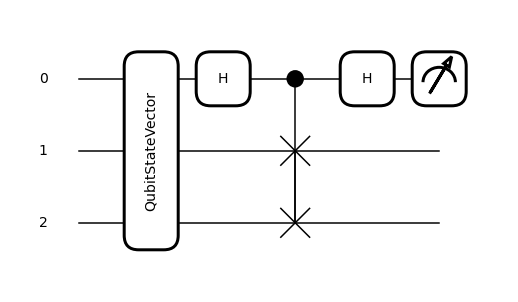

In [6]:
A = [20, 100]
B = [23, 10]

A = np.array(A)
A = A / np.sqrt(np.dot(A,A))
B = np.array(B)
B = B / np.sqrt(np.dot(B,B))
zeroth = np.array([1,0])
state_AB = np.kron([1,0],np.kron(A,B))

dev = qml.device("default.qubit", wires=3)
@qml.qnode(dev)
def circuit(state):
    qml.QubitStateVector(state_AB,wires=[0,1,2])
    qml.Hadamard(wires=0)
    qml.CSWAP(wires=[0,1,2])
    qml.Hadamard(wires=0)
    return qml.probs(op=qml.Identity(0))

print(qml.draw_mpl(circuit)(state_AB))

In [7]:
def distance(A, B):
    """Function that returns the distance between two vectors.

    Args:
        - A (list[int]): person's information: [age, minutes spent watching TV].
        - B (list[int]): person's information: [age, minutes spent watching TV].

    Returns:
        - (float): distance between the two feature vectors.
    """

    # The Swap test is a method that allows you to calculate |<A|B>|^2 , you could use it to help you.
    A = np.array(A)
    A = A / np.sqrt(np.dot(A,A)) # normalize A
    B = np.array(B)
    B = B / np.sqrt(np.dot(B,B)) # normalize B
    zeroth = np.array([1,0])
    state_AB = np.kron([1,0],np.kron(A,B))
    print(A,B,state_AB)
    dev = qml.device("default.qubit", wires=3)

    @qml.qnode(dev)
    def circuit(state):
        qml.QubitStateVector(state_AB,wires=[0,1,2])
        qml.Hadamard(wires=0)
        qml.CSWAP(wires=[0,1,2])
        qml.Hadamard(wires=0)
        return qml.probs(op=qml.Identity(0))

    probs = circuit(state_AB)
    distance = np.sqrt(2*(1-np.sqrt(2*(probs[0]-1/2))))

    return distance